In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [1]:
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

In [2]:
df = load_diabetes(as_frame=True)
df.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


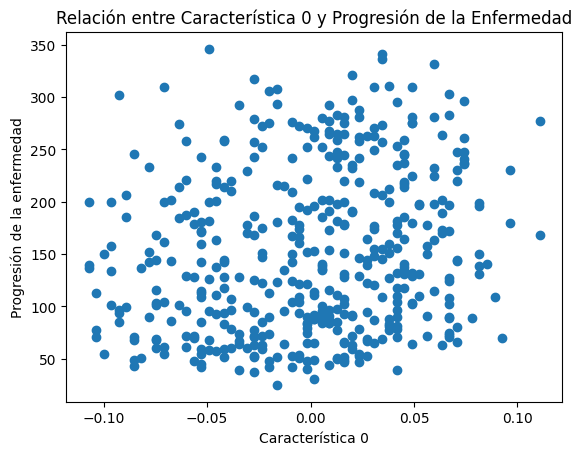

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Carga los datos de diabetes
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

# Selecciona una característica para graficar, por ejemplo, la primera característica
feature_index = 0
X_feature = X_diabetes[:, feature_index]

# Grafica la característica seleccionada contra el objetivo (y)
plt.scatter(X_feature, y_diabetes)
plt.xlabel('Característica {}'.format(feature_index))
plt.ylabel('Progresión de la enfermedad')
plt.title('Relación entre Característica {} y Progresión de la Enfermedad'.format(feature_index))
plt.show()

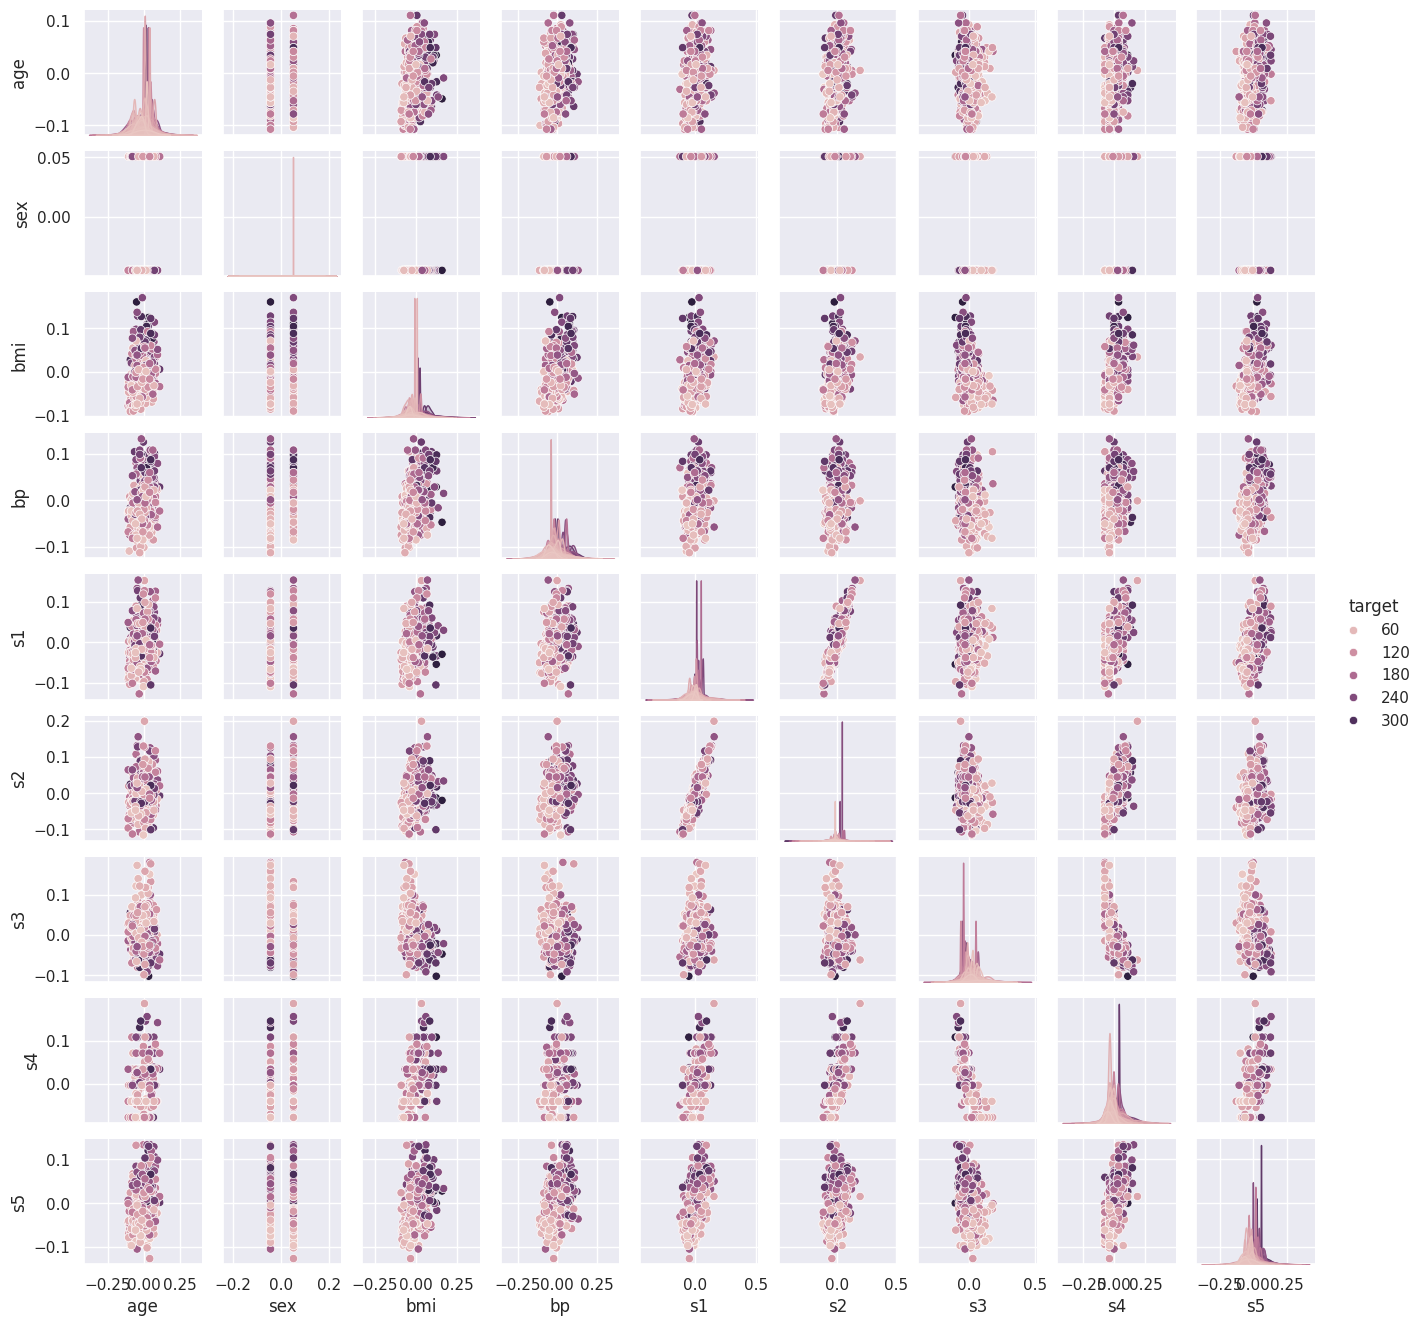

In [14]:
%matplotlib inline

import seaborn as sns; sns.set()

# Load the diabetes dataset as a DataFrame
diabetes_df = load_diabetes(as_frame=True).frame

# Plot only some of the columns since there are so many...takes a long time to do all
sns.pairplot(data=diabetes_df,
             x_vars=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'],
             y_vars=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'],
             hue='target', height=1.5)

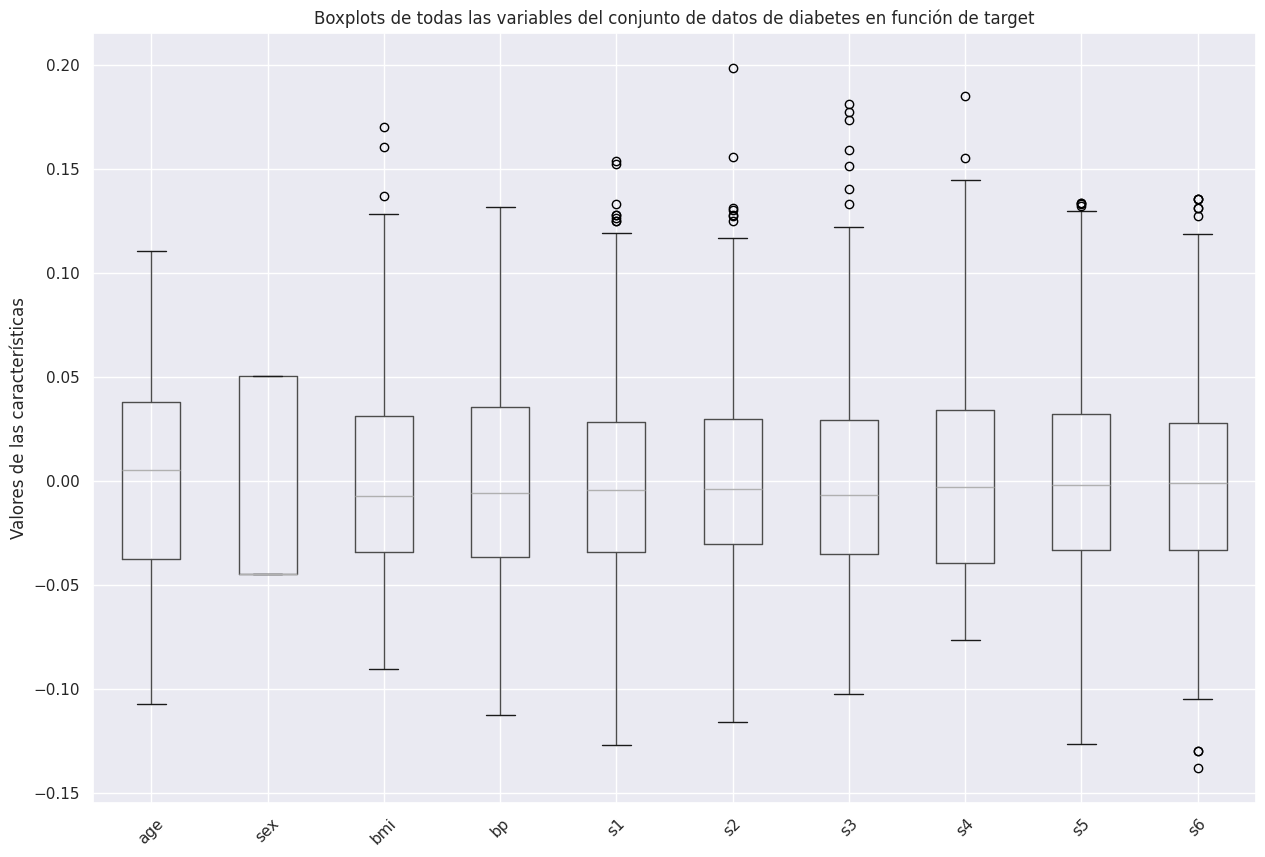

In [53]:
# Carga los datos de diabetes
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
diabetes_data = load_diabetes()

# Crea un DataFrame con los datos
df = pd.DataFrame(X_diabetes, columns=diabetes_data.feature_names)
df['target'] = y_diabetes

# Genera los boxplots para todas las variables en función de la variable objetivo
plt.figure(figsize=(15, 10))
df.boxplot(column=diabetes_data.feature_names)
plt.xticks(rotation=45)
plt.title('Boxplots de todas las variables del conjunto de datos de diabetes en función de target')
plt.ylabel('Valores de las características')
plt.show()

R^2: 0.1949061431435003
MSE: 4774.113902368687


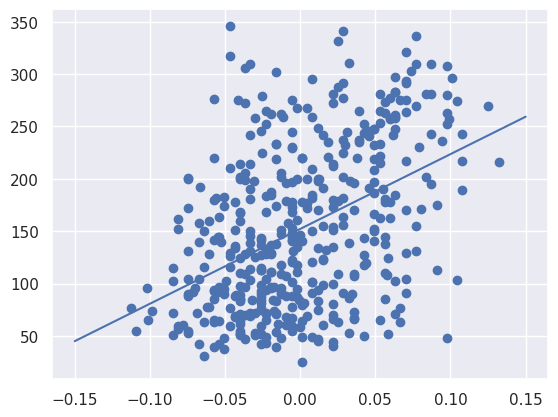

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_bp,y_diabetes)

def check_model(model, x, y):
    '''A function to get R^2 and plot regression'''
    
    Xfit = np.linspace(-0.15,0.15, len(y))[:, None] # Get some X-values for the fit curve
    yfit =  model.predict(Xfit) # Get the predicted y-values

    # Print model score R^2
    print(f'R^2: {model.score(x,y)}') # Get R^2 using the original data
    
    # Print MSE for the model
    print(f'MSE: {np.mean((y-model.predict(x))**2)}')
          
    # Visilize the results
    plt.scatter(x,y) # Scatter plot of our training data
    plt.plot(Xfit,yfit) # Our linear model
    
check_model(model, X_bp, y_diabetes)

R^2: 0.19797897085384186
MSE: 4755.892387738325


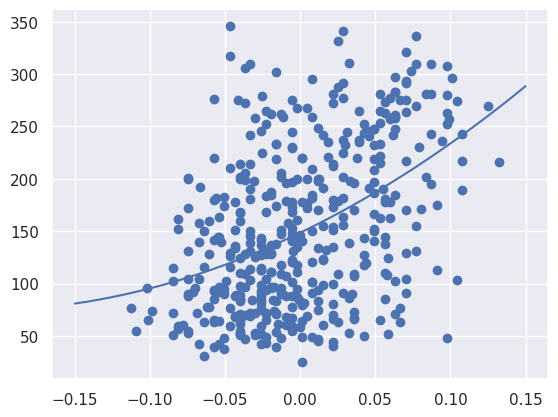

In [32]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linreg', LinearRegression(fit_intercept=False))
])

model.fit(X_bp,y_diabetes)

check_model(model, X_bp, y_diabetes)


R^2: 0.203956437355846
MSE: 4720.446699406303


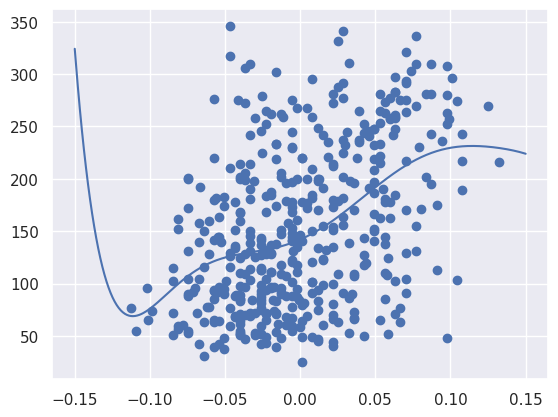

In [33]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=7)),
    ('linreg', LinearRegression(fit_intercept=False))
])

model.fit(X_bp,y_diabetes)

check_model(model, X_bp, y_diabetes)

In [34]:
def PolynomialRegression(degree=2, **kwargs):
    return Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('poly', PolynomialFeatures(degree=degree)),
    ('linreg', LinearRegression(fit_intercept=False))
    ])

In [35]:
# Let's split the data into training/testing data
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes,
                                                random_state=1)

In [36]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('linreg', LinearRegression(fit_intercept=False))
])

model.fit(X_train,y_train)

print(f'Training data score: {model.score(X_train,y_train)}')
print(f'Testing data score: {model.score(X_test,y_test)}')


Training data score: 0.5359163748137687
Testing data score: 0.4439690125828367


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/weird_function_data.csv')

X = df[['x']] # Get the x values
y = df.y # get the y values

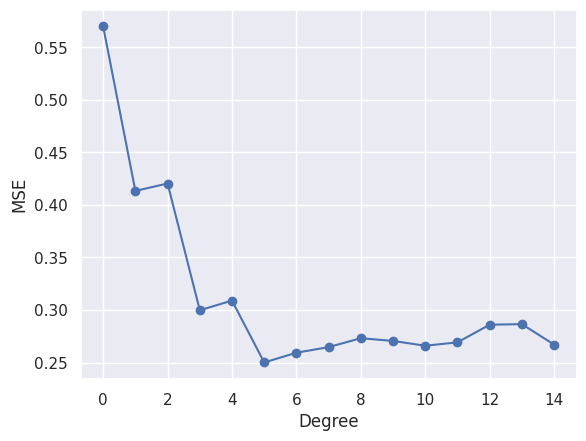

In [38]:
#Split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

def mse(model, x, y):
    return np.mean((y-model.predict(x))**2)
    
err = []
degrees = range(15)

for degree in degrees:
    # Make our model
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linreg', LinearRegression(fit_intercept=False))
    ])

    # Fit the model
    model.fit(X_train,y_train)
    err.append(mse(model, X_test, y_test)) # Get MSE for model and append to list

err_df = pd.DataFrame({'degree':degrees, 'mse':err})

# Line plot
plt.plot(err_df['degree'], err_df['mse'], label='MSE by Degree')

# Overlay points
plt.scatter(err_df['degree'], err_df['mse'])

# Adding labels and title
plt.xlabel('Degree')
plt.ylabel('MSE')

# Display the plot
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score, KFold

model = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),
    ('linreg', LinearRegression(fit_intercept=False))
])


kf = KFold(n_splits=10, shuffle=True)
res = cross_val_score(model, X, y, cv=kf, scoring=mse)
    
print(res)
print(f'Average MSE: {res.mean()}')

[0.33974177 0.14798353 0.35320036 0.19874174 0.09390937 0.1020837
 0.20769576 0.12295244 0.23255146 0.29378225]
Average MSE: 0.2092642362617545


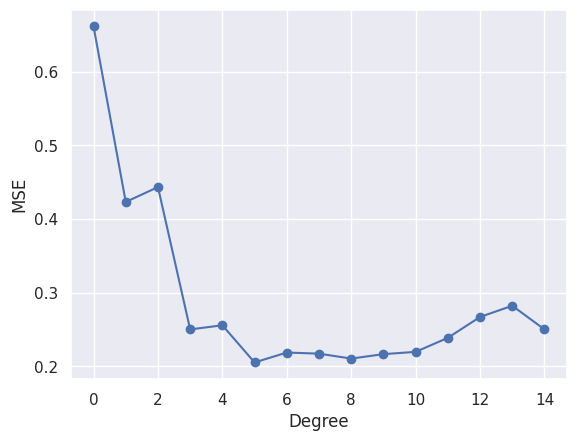

In [40]:
err = []
degrees = range(15)

kf = KFold(n_splits=10, shuffle=True)

for degree in degrees:
    # Make our model
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linreg', LinearRegression(fit_intercept=False))
    ])

    # Fit the model
    res = cross_val_score(model, X, y, cv=kf, scoring=mse)
    err.append(res.mean()) # Get MSE for model and append to list

err_df = pd.DataFrame({'degree':degrees, 'mse':err})

# Line plot
plt.plot(err_df['degree'], err_df['mse'], label='MSE by Degree')

# Overlay points
plt.scatter(err_df['degree'], err_df['mse'])

# Adding labels and title
plt.xlabel('Degree')
plt.ylabel('MSE')

# Display the plot
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'poly__degree': np.arange(21),
              'linreg__fit_intercept': [True, False],
              'scaler__with_mean': [True, False],
              'scaler__with_std': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [42]:
# Once we call the .fit method all the models will be fit
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linreg',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'linreg__fit_intercept': [True, False],
                         'poly__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),
                         'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False]})

In [43]:
# The best parameters are stored in grid.best_params_
grid.best_params_

{'linreg__fit_intercept': False,
 'poly__degree': np.int64(3),
 'scaler__with_mean': False,
 'scaler__with_std': True}

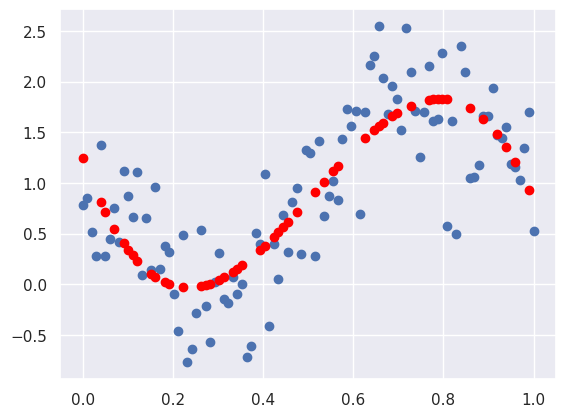

In [44]:
# We can then use the model using grid.best_estimator_
model = grid.best_estimator_

# Predict our y's using the model
y_test = model.fit(X,y).predict(X_test)


# Plot the data in blue and the predicted data in red.
plt.scatter(X,y) # Scatter plot of our training data
plt.scatter(X_test,y_test, color='red') # Our linear model
    

In [57]:
X = df.drop(columns=['target'])
y = df['target']

model = LinearRegression()
model.fit(X, y)

def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

print('R^2:', model.score(X, y), 'MSE:', mse(model, X, y))

R^2: 0.5177484222203499 MSE: 2859.69634758675


In [58]:
kf = KFold(n_splits=5)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

c-v R^2: 0.48231643590864215 c-v MSE: 2993.0813104693307


In [59]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.01))])
    
#model = Lasso(alpha=0.01, normalize=True)  # Remember alpha is our lambda; Try different values here!
model.fit(X, y)
print(model.named_steps['lasso'].coef_ / model.named_steps['scaler'].scale_)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

[  -9.52769705 -239.37835902  520.04642007  323.9275099  -757.95945438
  450.41510254   84.72279994  171.06251026  738.93537677   67.55540298]
c-v R^2: 0.48231700621611057 c-v MSE: 2993.0696718174377


In [60]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.))])
model.fit(X, y)

print(model.named_steps['ridge'].coef_ / model.named_steps['scaler'].scale_)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

[  -9.06488603 -238.27644969  520.7855355   323.20875771 -632.57239728
  350.11247748   30.73903959  158.12230218  690.50031925   68.67180929]
c-v R^2: 0.4821936251213234 c-v MSE: 2993.6406833215437


In [61]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('lassoCV', LassoCV())])

model.fit(X, y)
print(model.named_steps['lassoCV'].coef_ / model.named_steps['scaler'].scale_)
print(f"Lambda: {model.named_steps['lassoCV'].alpha_}")

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

[  -6.49469328 -235.99308032  521.7443693   321.0607768  -569.43813385
  302.45319289   -0.          143.69851474  669.92267515   66.83551067]
Lambda: 0.07891843500595844
c-v R^2: 0.4818598404008808 c-v MSE: 2996.1880908280964


In [62]:
lambdas = np.geomspace(0.1, 10, 100) # Unlike LassoCV, we need to provide the lambds, here we use a logarithmic scale.
                                    # Note that we need to update the search range--0.001 should be good in the end.
model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridgeCV', RidgeCV(alphas=lambdas))])

model.fit(X, y)
print(model.named_steps['ridgeCV'].coef_)
print(f"Lambda: {model.named_steps['ridgeCV'].alpha_}")

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

[ -0.40206089 -11.28111604  24.78479634  15.33453826 -25.65033435
  13.13365932  -0.47979006   7.01111817  31.13693467   3.30159287]
Lambda: 1.873817422860385
c-v R^2: 0.47988055499767485 c-v MSE: 3007.071188322441
